In [ ]:
#Q1

In [1]:
import tensorflow as tf
import numpy as np

# 1. Defining 5x5 input matrix
input_matrix = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
], dtype=np.float32)

# Reshaping to (1, height, width, channels) for TensorFlow
input_tensor = tf.constant(input_matrix.reshape(1, 5, 5, 1))

# 2. Defining 3x3 kernel
kernel_matrix = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
], dtype=np.float32)

# Reshaping kernel to (kernel_height, kernel_width, input_channels, output_channels)
kernel_tensor = tf.constant(kernel_matrix.reshape(3, 3, 1, 1))

# Functioning to apply convolution with different stride and padding
def apply_convolution(stride, padding):
    conv = tf.nn.conv2d(input_tensor, kernel_tensor, strides=[1, stride, stride, 1], padding=padding)
    return tf.squeeze(conv).numpy()

# 3. Applying convolution with different parameters
output_valid_1 = apply_convolution(stride=1, padding='VALID')
output_same_1 = apply_convolution(stride=1, padding='SAME')
output_valid_2 = apply_convolution(stride=2, padding='VALID')
output_same_2 = apply_convolution(stride=2, padding='SAME')

# 4. Printing output feature maps
print("Output (Stride=1, Padding='VALID'):\n", output_valid_1)
print("\nOutput (Stride=1, Padding='SAME'):\n", output_same_1)
print("\nOutput (Stride=2, Padding='VALID'):\n", output_valid_2)
print("\nOutput (Stride=2, Padding='SAME'):\n", output_same_2)


Output (Stride=1, Padding='VALID'):
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Output (Stride=1, Padding='SAME'):
 [[  4.   3.   2.   1.  -6.]
 [ -5.   0.   0.   0. -11.]
 [-10.   0.   0.   0. -16.]
 [-15.   0.   0.   0. -21.]
 [-46. -27. -28. -29. -56.]]

Output (Stride=2, Padding='VALID'):
 [[0. 0.]
 [0. 0.]]

Output (Stride=2, Padding='SAME'):
 [[  4.   2.  -6.]
 [-10.   0. -16.]
 [-46. -28. -56.]]


In [ ]:
#Q2

Saving cat image.jpg to cat image.jpg


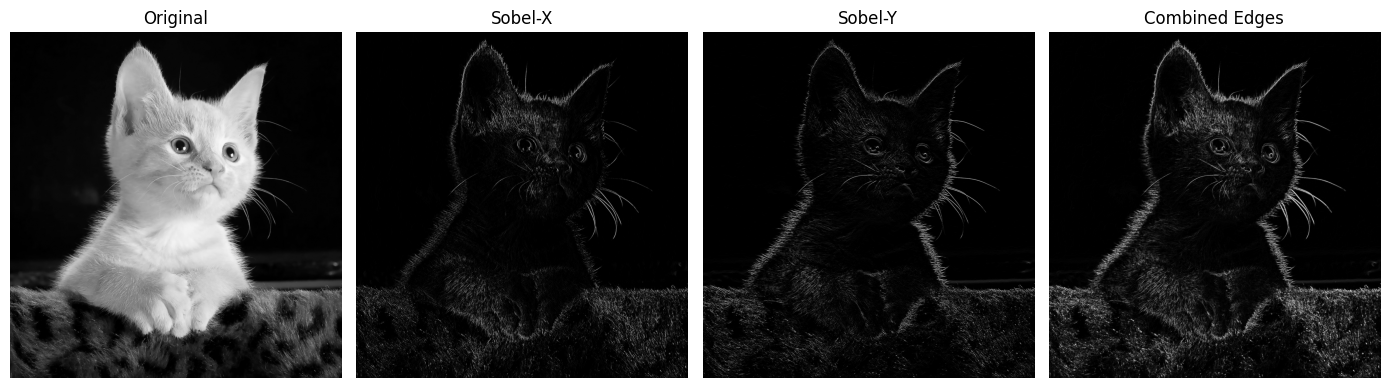

True

In [3]:
# Importing necessary libraries
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Uploading the image
uploaded = files.upload()

# Step 2: Loading and converting image to grayscale
for fname in uploaded.keys():
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 3: Defining Sobel Filters
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

# Step 4: Applying Sobel filters
sobel_x_img = cv2.filter2D(gray, -1, sobel_x)
sobel_y_img = cv2.filter2D(gray, -1, sobel_y)

# Step 5: Combining both edge maps
combined_edges = cv2.magnitude(np.float32(sobel_x_img), np.float32(sobel_y_img))
combined_edges = np.uint8(np.clip(combined_edges, 0, 255))  # Convert back to 8-bit

# Step 6: Plotting all images
plt.figure(figsize=(14, 6))

plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Sobel-X")
plt.imshow(sobel_x_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Sobel-Y")
plt.imshow(sobel_y_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Combined Edges")
plt.imshow(combined_edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()




In [4]:
import tensorflow as tf

# Creating a 4x4 random matrix
input_matrix = tf.random.uniform(shape=(1, 4, 4, 1), minval=0, maxval=10, dtype=tf.float32)
print("Original 4x4 Matrix:\n", tf.squeeze(input_matrix).numpy())

# Maxing Pooling (2x2)
max_pool = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)
max_pooled_output = max_pool(input_matrix)
print("\nMax Pooled Matrix:\n", tf.squeeze(max_pooled_output).numpy())

# Averaging Pooling (2x2)
avg_pool = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2)
avg_pooled_output = avg_pool(input_matrix)
print("\nAverage Pooled Matrix:\n", tf.squeeze(avg_pooled_output).numpy())


Original 4x4 Matrix:
 [[6.0931244  5.3442297  0.11383414 2.5933456 ]
 [0.66631913 2.076794   3.9110816  0.5783224 ]
 [2.7972066  4.7431564  7.785146   0.91787577]
 [5.3669586  9.880458   2.4839282  0.2820027 ]]

Max Pooled Matrix:
 [[6.0931244 3.9110816]
 [9.880458  7.785146 ]]

Average Pooled Matrix:
 [[3.5451167 1.7991459]
 [5.696945  2.8672383]]


In [ ]:
#Q3

Original Data Sample:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

After Min-Max Normalization Sample:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667

After Z-score Standardizatio

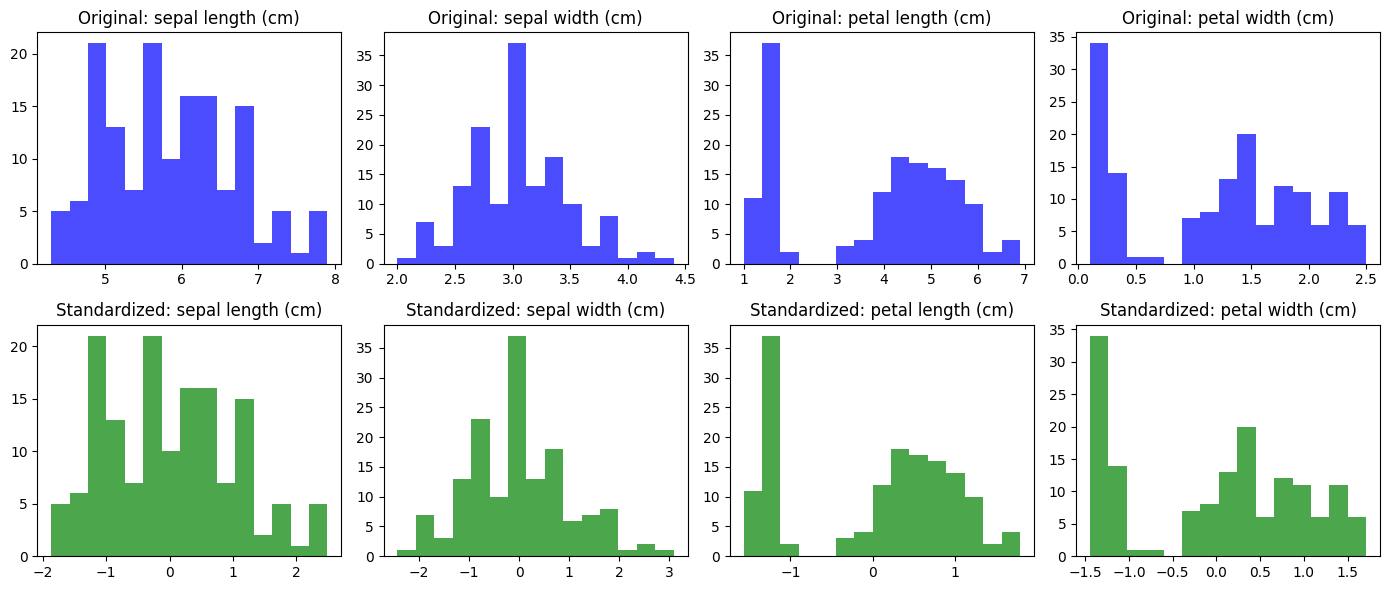

Accuracy on Original Data: 1.0000
Accuracy on Min-Max Normalized Data: 0.9111
Accuracy on Standardized Data: 1.0000

Explanation:

- Normalization (Min-Max Scaling) rescales data to a fixed range [0,1]. 
  It's useful when we want all features to have the same scale, especially for algorithms that depend on distances like KNN or neural networks with sigmoid activations.

- Standardization (Z-score) centers data to mean 0 and scales to unit variance. 
  This is preferred when data follows a Gaussian distribution or for models like Logistic Regression, SVM, and neural networks with ReLU activation.

- For deep learning, standardization is often preferable because it keeps data centered and helps gradients flow better. 
- Normalization is used if features have different units or scales, or when activation functions require input in a specific range.



In [5]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Loading Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

print("Original Data Sample:")
print(pd.DataFrame(X, columns=feature_names).head())

# 2. Min-Max Normalization (scales features to [0,1])
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)

print("\nAfter Min-Max Normalization Sample:")
print(pd.DataFrame(X_minmax, columns=feature_names).head())

# 3. Z-score Standardization (mean=0, std=1)
scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X)

print("\nAfter Z-score Standardization Sample:")
print(pd.DataFrame(X_standard, columns=feature_names).head())

# 4. Visualizing distributions before and after scaling
plt.figure(figsize=(14, 6))

for i in range(4):
    plt.subplot(2, 4, i+1)
    plt.hist(X[:, i], bins=15, color='blue', alpha=0.7)
    plt.title(f"Original: {feature_names[i]}")

    plt.subplot(2, 4, i+5)
    plt.hist(X_standard[:, i], bins=15, color='green', alpha=0.7)
    plt.title(f"Standardized: {feature_names[i]}")

plt.tight_layout()
plt.show()

# 5. Training Logistic Regression model on original data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
model_orig = LogisticRegression(max_iter=200)
model_orig.fit(X_train, y_train)
y_pred_orig = model_orig.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)
print(f"Accuracy on Original Data: {acc_orig:.4f}")

# Training Logistic Regression model on Min-Max normalized data
X_train_mm, X_test_mm, y_train_mm, y_test_mm = train_test_split(X_minmax, y, random_state=42, test_size=0.3)
model_mm = LogisticRegression(max_iter=200)
model_mm.fit(X_train_mm, y_train_mm)
y_pred_mm = model_mm.predict(X_test_mm)
acc_mm = accuracy_score(y_test_mm, y_pred_mm)
print(f"Accuracy on Min-Max Normalized Data: {acc_mm:.4f}")

# Training Logistic Regression model on Standardized data
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_standard, y, random_state=42, test_size=0.3)
model_std = LogisticRegression(max_iter=200)
model_std.fit(X_train_std, y_train_std)
y_pred_std = model_std.predict(X_test_std)
acc_std = accuracy_score(y_test_std, y_pred_std)
print(f"Accuracy on Standardized Data: {acc_std:.4f}")

# 6. Explanation:
print("\nExplanation:")
print("""
- Normalization (Min-Max Scaling) rescales data to a fixed range [0,1].
  It's useful when we want all features to have the same scale, especially for algorithms that depend on distances like KNN or neural networks with sigmoid activations.

- Standardization (Z-score) centers data to mean 0 and scales to unit variance.
  This is preferred when data follows a Gaussian distribution or for models like Logistic Regression, SVM, and neural networks with ReLU activation.

- For deep learning, standardization is often preferable because it keeps data centered and helps gradients flow better.
- Normalization is used if features have different units or scales, or when activation functions require input in a specific range.
""")
